In [2]:
import sys
sys.path.insert(0, '../lib')  # noqa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import pdb
from sklearn.metrics import *
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import itertools
import csv

In [4]:
genres_data = pd.read_csv(
    'movielens-dataset/u.genre', 
    sep = '|', 
    encoding = "ISO-8859-1", 
    header = None, 
    names=['name', 'id']
)

In [5]:
genres_data.head()

,name,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [6]:

movie_data_columns = np.append(
    ['movie_id', 'title', 'release_date', 'video_release_date', 'url'], 
    genres_data['name'].values
)

In [7]:

movie_data = pd.read_csv(
    'movielens-dataset/u.item', 
    sep = '|', 
    encoding = "ISO-8859-1", 
    header = None, 
    names = movie_data_columns,
    index_col = 'movie_id'
)

In [8]:
selected_columns = np.append(['title', 'release_date'], genres_data['name'].values)
movie_data = movie_data[selected_columns]
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])
movie_data.head()

,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
ratings_data = pd.read_csv(
    'movielens-dataset/u.data', 
    sep = '\t', 
    encoding = "ISO-8859-1", 
    header = None, 
    names=['user_id', 'movie_id', 'rating', 'timestamp']
)

In [10]:

user_data = pd.read_csv(
    'movielens-dataset/u.user', 
    sep = '|', 
    encoding = "ISO-8859-1", 
    header = None, 
    names=['user_id', 'age', 'sex', 'occupation', 'zip_code']
)
user_data.head()

#a = np.reshape(a, (1,np.product(a.shape)))


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
movie_data['ratings_average'] = ratings_data.groupby(['movie_id'])['rating'].mean()
movie_data['ratings_count'] = ratings_data.groupby(['movie_id'])['rating'].count()

In [12]:
movie_data[['title', 'ratings_average', 'ratings_count']].head()

,title,ratings_average,ratings_count
movie_id,,,
1,Toy Story (1995),3.878319,452
2,GoldenEye (1995),3.206107,131
3,Four Rooms (1995),3.033333,90
4,Get Shorty (1995),3.550239,209
5,Copycat (1995),3.302326,86


In [13]:
movie_data.apply(lambda x:sum(x.isnull()),axis=0)

title              0
release_date       1
unknown            0
Action             0
Adventure          0
Animation          0
Children's         0
Comedy             0
Crime              0
Documentary        0
Drama              0
Fantasy            0
Film-Noir          0
Horror             0
Musical            0
Mystery            0
Romance            0
Sci-Fi             0
Thriller           0
War                0
Western            0
ratings_average    0
ratings_count      0
dtype: int64

In [14]:
# Remove null release dates rows from movie_data. The alternate could be to place mode, median, mean and average
movie_data = movie_data[movie_data['release_date'].notnull()]


In [16]:
# Recheck to make sure whether null values has been removed or not from movie_data
movie_data.apply(lambda x:sum(x.isnull()),axis=0)

title              0
release_date       0
unknown            0
Action             0
Adventure          0
Animation          0
Children's         0
Comedy             0
Crime              0
Documentary        0
Drama              0
Fantasy            0
Film-Noir          0
Horror             0
Musical            0
Mystery            0
Romance            0
Sci-Fi             0
Thriller           0
War                0
Western            0
ratings_average    0
ratings_count      0
dtype: int64

In [17]:
oldest_date = pd.to_datetime(movie_data['release_date']).min()
most_recent_date = pd.to_datetime(movie_data['release_date']).max()
normalised_age = (most_recent_date - pd.to_datetime(movie_data['release_date'])) / (most_recent_date - oldest_date)
normalised_rating = (5 - movie_data['ratings_average']) / (5 - 1)

movie_data['price'] = np.round((1 - normalised_rating) * (1 - normalised_age) * 10)
movie_data[['title', 'price', 'ratings_average', 'ratings_count']].head()

,title,price,ratings_average,ratings_count
movie_id,,,,
1,Toy Story (1995),7.0,3.878319,452
2,GoldenEye (1995),5.0,3.206107,131
3,Four Rooms (1995),5.0,3.033333,90
4,Get Shorty (1995),6.0,3.550239,209
5,Copycat (1995),5.0,3.302326,86


In [18]:
movie_data = movie_data[movie_data['price'].notnull()]

In [19]:
# the lower the price, the more likely User going to buy
movie_data['buy_probability'] = 1 - movie_data['price'] * 0.1

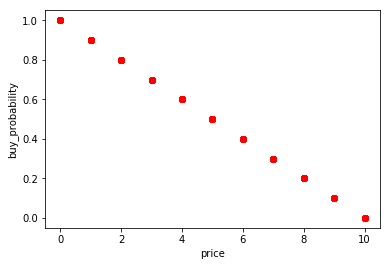

In [20]:
plt.plot(movie_data['price'].values, movie_data['buy_probability'].values, 'ro') # ro = red circles
plt.xlabel('price')
plt.ylabel('buy_probability')
plt.show()

In [50]:
def plot_genres(movie_data):
    genres_array = [(genre, movie_data[genre].sum()) for genre in genres_data['name'].values]
    genres_names = list(map(lambda x: x[0], genres_array))
    genres_count = list(map(lambda x: x[1], genres_array))

    genres_df = pd.DataFrame({'name': genres_names, 'count': genres_count})
    x = np.arange(len(genres_df['name'].values))
    plt.bar(x, genres_df['count'].values)
    plt.xticks(x, genres_df['name'].values, rotation='vertical')
    plt.title("Genres distribution")
    
def plot_years(movie_data):
    years = movie_data['release_date'].values.astype('datetime64[Y]').astype(int) + 1970
    plt.hist(years)
    plt.title("Years distribution")
    
def plot_ratings(movie_data):
    movie_data['ratings_average'].hist()
    plt.title("Ratings distribution")
    
def plot_price(movie_data):
    movie_data['price'].hist()
    plt.title("Price distribution")
    
def plot_ratings_count(movie_data):
    movie_data['ratings_count'].hist()
    plt.title("Ratings count")
    
def buy_probability_distribution(movie_data):
    movie_data['buy_probability'].hist(bins=11)
    plt.title("Buy probability distribution")

In [51]:
def plot_distributions(movie_data):
    fig = plt.figure(figsize=(8, 6)) 

    fig.add_subplot(3, 2, 1)
    plot_genres(movie_data)

    fig.add_subplot(3, 2, 2)
    plot_years(movie_data)

    fig.add_subplot(3, 2, 3)
    plot_ratings(movie_data)

    fig.add_subplot(3, 2, 4)
    plot_price(movie_data)

    fig.add_subplot(3, 2, 5)
    plot_ratings_count(movie_data)

    fig.add_subplot(3, 2, 6)
    buy_probability_distribution(movie_data)

    plt.tight_layout()

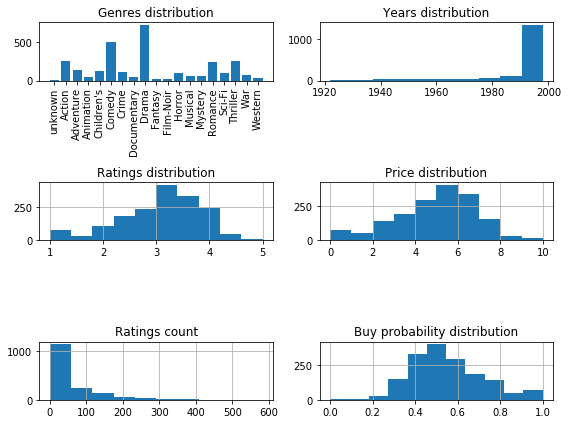

In [23]:
plot_distributions(movie_data)

In [24]:
movie_data.head()

,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,ratings_average,ratings_count,price,buy_probability
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3.878319,452,7.0,0.3
2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,3.206107,131,5.0,0.5
3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,3.033333,90,5.0,0.5
4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,3.550239,209,6.0,0.4
5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,3.302326,86,5.0,0.5


In [25]:
# The users database
class User:
    def __init__(self, id):
        self.id = id
        self.positive = []
        self.negative = []
        
    def add_positive(self, movie_id):
        self.positive.append(movie_id)
    
    def add_negative(self, movie_id):
        self.negative.append(movie_id)
    
    def get_positive(self):
        return self.positive
    
    def get_negative(self):
        return self.negative

In [26]:
#np.random.choice(movie_data.index.values,20)
#learning_data.head()

In [27]:
#ratings_data.iloc[0,:]
#np.random.choice(1, 20)
#events_data.head()
#ratings_data.loc[((ratings_data['user_id'] == 1) & (ratings_data['movie_id'] == 61)),'rating']

In [32]:
np.random.seed(1)

class EventsGenerator:
    # Since we are not having accurate and live dataset, lets assume the number of movies opened by each users are 20
    num_of_opened_movies_per_user = 20
    users_count = user_data['user_id'].count()

    def __init__(self, learning_data, buy_probability):
        self.learning_data = learning_data
        self.buy_probability = buy_probability
        self.users = []
        for id in range(1, self.users_count):
            self.users.append(User(id))
        
    def run(self, pairwise=False):
        for user in self.users:
            opened_movies = np.random.choice(self.learning_data.index.values, self.num_of_opened_movies_per_user)
            self.__add_positives_and_negatives_to(user, opened_movies)
        return self.__build_events_data()

    def __add_positives_and_negatives_to(self, user, opened_movies):
        for movie_id in opened_movies:
            if np.random.binomial(1, self.buy_probability.loc[movie_id]): 
                user.add_positive(movie_id)
            else:
                user.add_negative(movie_id)
                
    def __build_events_data(self):
        events_data = []
        for user in self.users:
            for positive_id in user.get_positive():
                tmp = learning_data.loc[positive_id].to_dict()
                tmp['outcome'] = 1
                events_data += [tmp]
            
            for negative_id in user.get_negative():
                tmp = learning_data.loc[negative_id].to_dict()
                tmp['outcome'] = 0
                events_data += [tmp]
                
        return pd.DataFrame(events_data)   


In [33]:

def build_learning_data_from(movie_data):
    feature_columns = np.setdiff1d(movie_data.columns, np.array(['title', 'buy_probability']))
    learning_data = movie_data.loc[:, feature_columns]
    
    scaler = StandardScaler()
    learning_data.loc[:, ('price')] = scaler.fit_transform(learning_data[['price']])
    learning_data['ratings_average'] = scaler.fit_transform(learning_data[['ratings_average']])
    learning_data['ratings_count'] = scaler.fit_transform(learning_data[['ratings_count']])
    learning_data['release_date'] = learning_data['release_date'].apply(lambda x: x.year)
    learning_data['release_date'] = scaler.fit_transform(learning_data[['release_date']])
    
    return learning_data

In [42]:
def save_events_data(events_data, learning_data, tag, pairwise=False):
    events_data = events_data.reindex(np.random.permutation(events_data.index))
    events_data.to_csv('movie_events_' + tag + '.csv')
    
    if not pairwise:
        df = pd.DataFrame(get_feature_columns_from(learning_data))
        df.to_csv("feature_columns_" + tag + ".csv")
    else:
        df = pd.DataFrame(get_feature_columns_from(learning_data, pairwise=True))
        df.to_csv("feature_columns_" + tag + ".csv")
def load_events_data(tag):
    events_data = pd.DataFrame.from_csv('movie_events_' + tag + '.csv')
    tmp = pd.DataFrame.from_csv("feature_columns_" + tag + ".csv")
    feature_columns = tmp['0'].values
    
    return [events_data, feature_columns]

In [43]:
def get_feature_columns_from(learning_data, pairwise=False):
    if not pairwise:
        return learning_data.columns.values
    else:
        f1 = [c + '_1' for c in learning_data.columns.values]
        f2 = [c + '_2' for c in learning_data.columns.values]
        f1.extend(f2)
        return np.asarray(f1)

In [44]:
learning_data = build_learning_data_from(movie_data)
events_data = EventsGenerator(learning_data, movie_data['buy_probability']).run()
events_data.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Sci-Fi,Thriller,War,Western,outcome,price,ratings_average,ratings_count,release_date,unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,-0.246723,-0.352894,-0.677865,0.464156,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,-0.777083,-0.301717,-0.429030,-1.009596,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.283637,0.450398,1.760721,-0.027095,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,-0.246723,-0.303368,-0.354379,0.323799,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1.344357,1.182399,-0.665424,0.464156,0.0


In [37]:
def get_test_train_data(events_data, feature_columns):
    X = events_data.loc[:, feature_columns].values.astype(np.float32)
    print('overall input shape: ' + str(X.shape))

    y = events_data.loc[:, ['outcome']].values.astype(np.float32).ravel()
    print('overall output shape: ' + str(y.shape))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print('training input shape: ' + str(X_train.shape))
    print('training output shape: ' + str(y_train.shape))

    print('testing input shape: ' + str(X_test.shape))
    print('testing output shape: ' + str(y_test.shape))
    
    return [X_train, X_test, y_train, y_test]

In [45]:
save_events_data(events_data, learning_data, 'linear')

In [47]:
events_data, feature_columns = load_events_data('linear')

D:\App_Store\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if sys.path[0] == '':
D:\App_Store\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  del sys.path[0]


In [52]:

def plot_events_distribution(events_data):
    events_data_sample = events_data.sample(frac=0.1)
    negative_outcomes = events_data_sample[events_data_sample['outcome'] == 0.0]['price']
    positive_outcomes = events_data_sample[events_data_sample['outcome'] == 1.0]['price']
    
    outcomes = np.array(list(zip(negative_outcomes.values, positive_outcomes.values)))
    plt.hist(outcomes, bins=11, label = ['Negative', 'Positive'])
    plt.legend()
    plt.xlabel('price')
    plt.show()

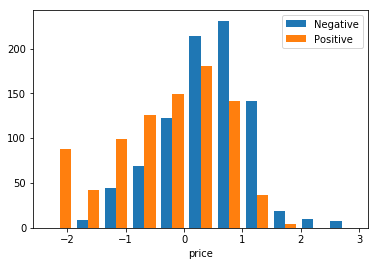

In [53]:
plot_events_distribution(events_data)

In [54]:
def train_model(model, prediction_function, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = prediction_function(model, X_train)

    print('train precision: ' + str(precision_score(y_train, y_train_pred)))
    print('train recall: ' + str(recall_score(y_train, y_train_pred)))
    print('train accuracy: ' + str(accuracy_score(y_train, y_train_pred)))

    y_test_pred = prediction_function(model, X_test)

    print('test precision: ' + str(precision_score(y_test, y_test_pred)))
    print('test recall: ' + str(recall_score(y_test, y_test_pred)))
    print('test accuracy: ' + str(accuracy_score(y_test, y_test_pred)))
    
    return model

In [55]:
X_train, X_test, y_train, y_test = get_test_train_data(events_data, feature_columns)

overall input shape: (18840, 23)
overall output shape: (18840,)
training input shape: (15072, 23)
training output shape: (15072,)
testing input shape: (3768, 23)
testing output shape: (3768,)


In [56]:
def get_predicted_rank(model, data):
    print(model)
    return model.predict_proba(data)[:, 1]

In [57]:
def get_predicted_outcome(model, data):
    return np.argmax(model.predict_proba(data), axis=1).astype(np.float32)

In [59]:
model = train_model(LogisticRegression(), get_predicted_outcome, X_train, y_train, X_test, y_test)

train precision: 0.674180563542
train recall: 0.701699784534
train accuracy: 0.646695859873
test precision: 0.677140255009
test recall: 0.702741020794
test accuracy: 0.644904458599


In [60]:
def plot_rank(features, model, learning_data, predict_fun):
    lg_input = learning_data.values.astype(np.float32)
    print('overall input shape: ' + str(lg_input.shape))

    learning_data_with_rank = learning_data.copy()
    learning_data_with_rank['rank'] = predict_fun(model, lg_input)
    
    for idx, feature in enumerate(features):
        plt.subplot(len(features), 1, idx + 1)
        plt.plot(learning_data_with_rank[feature].values, learning_data_with_rank['rank'].values, 'ro')
        plt.xlabel(feature)
        plt.ylabel('rank')
        
    plt.tight_layout()
    plt.show()

overall input shape: (1681, 23)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


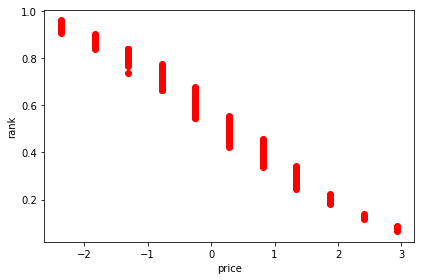

In [61]:
plot_rank(['price'], model, learning_data, get_predicted_rank)

In [62]:
movie_data.shape

(1681, 25)

In [63]:
get_predicted_rank(model,learning_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


array([ 0.29838527,  0.47475949,  0.50167156, ...,  0.82212417,
        0.50043329,  0.50773857])